# <i>Dscam</i> Manuscript (Figure 2)
This notebook details to code for visualizations produced for Figure 2 of the <i>Dscam</i> RNAi manuscript.

## Environment setup

In [87]:
# Set working directory
setwd("/Users/alexplocik/Google Drive/UConn/Lab Notebook/Dscam 4.2 EMAP/miSeq data analysis/")

# Install required packages
require(ggplot2)
require(grid)
require(RColorBrewer)
require(repr)
require(plyr)
# install.packages("gplots", repos = "http://watson.nci.nih.gov/cran_mirror/")
require(gplots)
source("/Users/alexplocik/Google Drive/UConn/R scripts/heatmapDscamV2.0.R")

# Set figure dimensions for notebook
options(repr.plot.width = 6, repr.plot.height = 3)

## Custom functions

In [73]:
# A ggplot theme good for small manuscript sized images
theme_bw_small <- function (base_size = 10, base_family = "") 
{
  theme_grey(base_size = base_size, base_family = base_family) %+replace% 
    theme(axis.text = element_text(size = rel(0.8)),
          axis.text.x = element_text(angle = 90, vjust = 0.5),
          axis.ticks = element_line(colour = "black"), 
          legend.key = element_rect(colour = "grey80"),
          panel.background = element_rect(fill = "white", colour = NA),
          panel.border = element_rect(fill = NA, colour = "grey50"), 
          panel.grid.major = element_line(colour = "grey90", size = 0.2), 
          panel.grid.minor = element_line(colour = "grey98", size = 0.5), 
          strip.background = element_rect(fill = "white", colour = "white", size = 0.2)) 
} # theme_bw_small()

plotting.factor.levels <- function(data){
  data$library <- factor(data$library, levels = levels(factor(data$library))[c(3:8, 1:2)], labels = gsub(" \\(", "\n(", levels(factor(data$library)))[c(3:8, 1:2)])
#   data$exon_cluster <- factor(data$exon_cluster, levels = levels(factor(data$exon_cluster))[c(2:4, 1)], labels = levels(factor(data$exon_cluster))[c(2:4, 1)])
  data$exon <- factor(data$exon, levels = levels(factor(data$exon))[c(3:length(levels(factor(data$exon))), 1:2)])
  data
} # plotting.factor.levels()

## Read data from file
Documentation on the generation of this data file is descibed in the "Dscam Manuscript Analysis" notebook.

In [90]:
all <- read.csv("Tables/Combined RNAi experiment data.csv", row.names = 1); all <- plotting.factor.levels(all)
all.filter <- subset(all, PSI.median > 0.1 & ((exon_cluster != 17 & cor >= 0.8) | exon_cluster == 17))
sig.hits <- read.csv("Tables/Significant z-scores.csv")
sig.matrix <- read.csv("Tables/Significant z-score matrix.csv", row.names = 1)

# Figure 2A.
The following figure illustrates RNAi depletion affects on variant exon PSI. The data was first filtered to remove exons with < 0.1 PSI and experiments with a Spearman correlation coefficient of < 0.8. Points indicate outliers.

In [75]:
# To produce plots from the unfiltered data.
#data <- all
#ggplot(subset(data, splice_event == "inclusion"), aes(x = exon, y = PSI,  color = library)) + geom_boxplot(outlier.size = 1) + facet_grid(. ~ exon_cluster, space = "free", scale = "free") + scale_color_manual(values = brewer.pal(8, "Paired")) + theme_bw_small() + ylab("Variant exon PSI") + xlab("")
#ggsave("Figures/Figure 2A. Exon variant inclusion PSI boxplots and points.pdf", height = 6, width = 20)
#ggplot(subset(data, splice_event == "skipping"), aes(x = exon, y =  PSI,  color = library)) + geom_boxplot(outlier.size = 1) + facet_grid(. ~ exon_cluster, space = "free", scale = "free") + scale_color_manual(values = brewer.pal(8, "Paired")) + theme_bw_small() + ylab("Percent skipping") + xlab("")
#ggsave("Figures/Figure 2A. Exon variant skipping PSI boxplots and points.pdf", height = 6, width = 3)

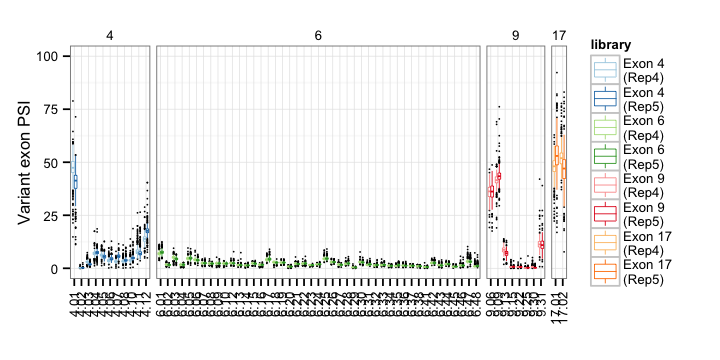

In [76]:
data <- all.filter
ggplot(subset(data, splice_event == "inclusion"), aes(x = exon, y = PSI,  color = library)) +
  geom_boxplot(outlier.size = 0.5, size = 0.25) +
  facet_grid(. ~ exon_cluster, space = "free", scale = "free") +
  scale_color_manual(values = brewer.pal(8, "Paired")) +
  theme_bw_small() +
  scale_y_continuous(breaks = c(seq(0, 100, 25)), limits = c(0, 100)) +
  ylab("Variant exon PSI") +
  xlab("")
ggsave("Figures/Figure 2A. Exon variant inclusion PSI boxplots and points (filtered).pdf", height = 4, width = 7.5)

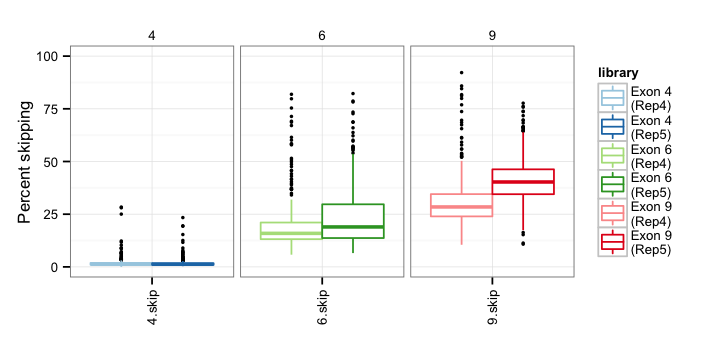

In [77]:
ggplot(subset(data, splice_event == "skipping"), aes(x = exon, y =  PSI,  color = library)) +
  geom_boxplot(outlier.size = 1) + facet_grid(. ~ exon_cluster, space = "free", scale = "free") +
  scale_color_manual(values = brewer.pal(8, "Paired")) +
  theme_bw_small() +
  scale_y_continuous(breaks = c(seq(0, 100, 25)), limits = c(0, 100)) +
  ylab("Percent skipping") +
  xlab("")
ggsave("Figures/Figure 2A. Exon variant skipping PSI boxplots and points (filtered).pdf", height = 4, width = 2.5)

# Figure 2B.

Saving 14 x 7 in image


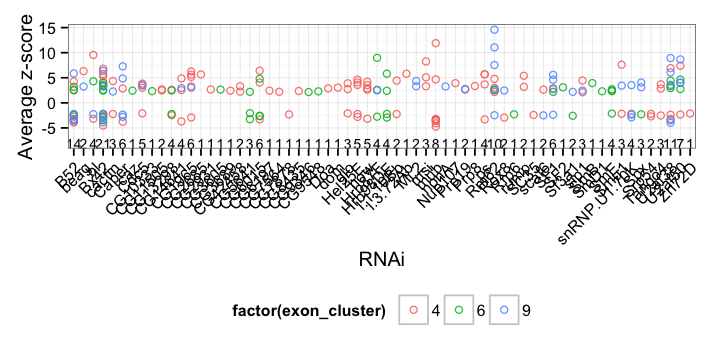

In [78]:
sig.hits.n <- ddply(sig.hits, "protein", summarize, n = length(protein))
ggplot(sig.hits, aes(x = protein, y = average.z, color = factor(exon_cluster))) +
  geom_point(shape = 1, alpha = 0.9) + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "bottom") + # + facet_wrap(~ exon, scales = "free_x", nrow = 1)
  geom_text(data = sig.hits.n, aes(x = protein, y = -8, label = n), color = "black", size = 3) +
  xlab("RNAi") + 
  ylab("Average z-score")
ggsave("Figures/Significant hits by exon cluster.pdf", width = 14)

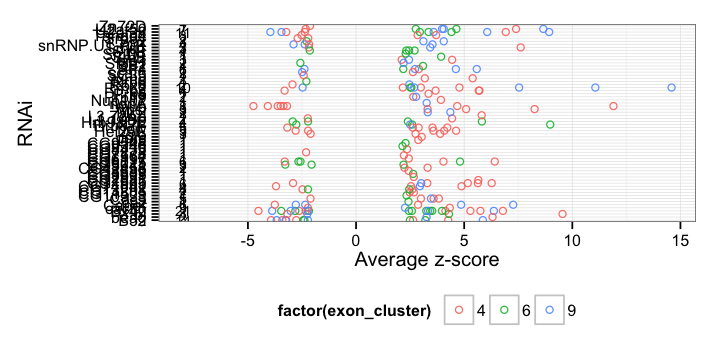

In [79]:
sig.hits.n <- ddply(sig.hits, "protein", summarize, n = length(protein))
ggplot(sig.hits, aes(y = protein, x = average.z, color = factor(exon_cluster))) +
  geom_point(shape = 1, alpha = 0.9) + 
  theme_bw() +
  scale_x_continuous() +
  theme(legend.position = "bottom") +
  ylab("RNAi") + 
  xlab("Average z-score") +
  geom_text(data = sig.hits.n, aes(y = protein, x = -8, label = n), color = "black", size = 3)
ggsave("Figures/Significant hits by exon cluster.pdf", height = 9, width = 4)

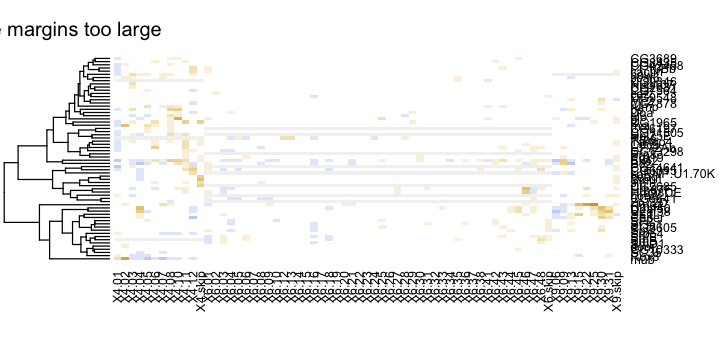

In [92]:
#pdf("Figures/Figure 2. Significant all z scores heatmap.pdf", width = 10, height = 10)
heatmap.3(as.matrix(sig.matrix), keysize = 0.75, Colv = F, na.color = "gray95", dendrogram = "row", col = colorpanel(n = 16, low = "royalblue", mid = "white", high = "goldenrod"), trace = "none", tracecol = "black")
#dev.off()